#### from previous notebooks

In [1]:
%reset -f

from PIL import Image
import ctypes
from ctypes import *
import numpy as np
import time

# http://localhost:8888/notebooks/1_Image_Metadata.ipynb
from AI_Decomposed import image_meta 
from AI_Decomposed import display_channel

# http://localhost:8888/notebooks/2_Py_Convolution.ipynb
from AI_Decomposed import PY_recurse_pooling

# http://localhost:8888/notebooks/3_CPP_Convolution.ipynb
from AI_Decomposed import native_recurse_pooling
cpp_function_ptr = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution

from AI_Decomposed import calc_ttl_pixels

# http://localhost:8888/notebooks/5_Calling_GPU_CUDA_code_from_Python.ipynb
gpu_function_ptr = cdll.LoadLibrary('/home/will/cuda-workspace/simple_pooling/src/lib_gpu_pooling.so').pooling

### load image

In [2]:
image_file = './imgs/bizz.jpg'
[height, width, red,green,blue] = image_meta(image_file)
channel_size = height * width

print('image height  : ', height)
print('image width   : ', width)
print('chanel size   : ', channel_size)
print('total pixels  : ', channel_size * 3) # 3 channels

image height  :  403
image width   :  940
chanel size   :  378820
total pixels  :  1136460


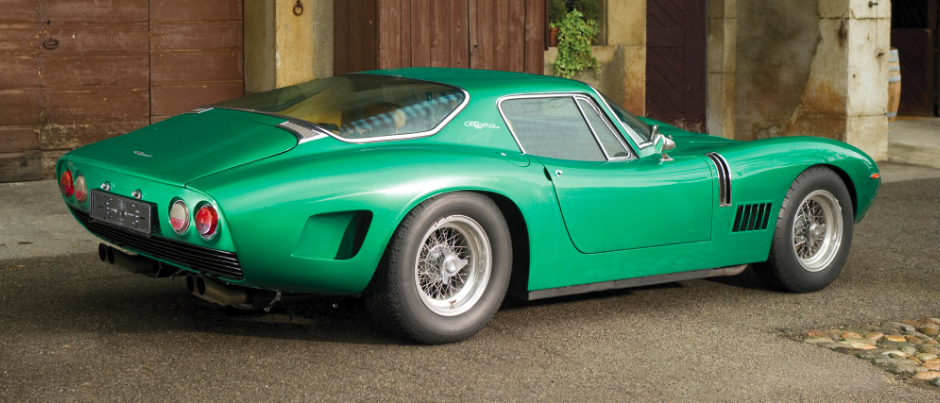

In [3]:
Image.open(image_file)

#### validate green channel

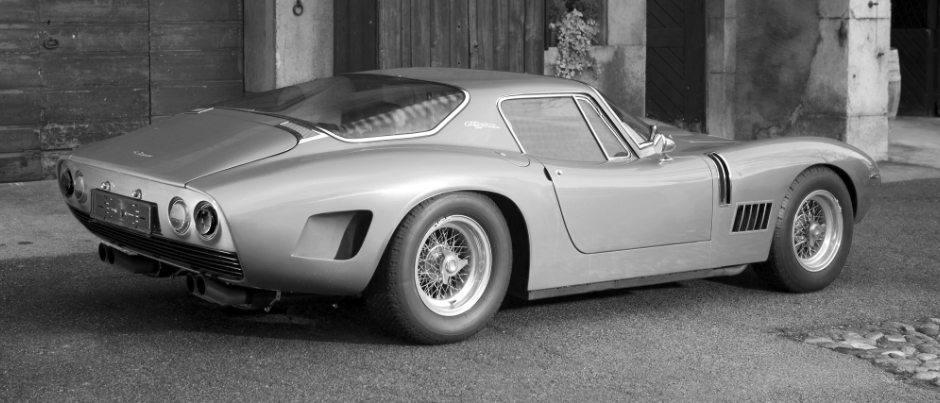

In [4]:
display_channel(green,width)

In [5]:
print('mat_size : ', len(green),'\n')
print('recurse_cnt,\tgpu_time,\tcpp_time\tpython_time')

py = list()
cpp = list()
gpu = list()
pixels_processed = list()
recursions = [1, 2, 3, 4] #, 15, 20, 25, 30, 35]

print('mat_size\t,\tpxls processed,\t\trecurse_cnt,\tcpp_time,\tpy_time')

for recurse_cnt in recursions:
    
    print(len(green),  end='', flush=True)
    print('\t\t,\t',   end='', flush=True)

    ttl_pixels_calced = calc_ttl_pixels(width, height, recurse_cnt)
    pixels_processed.append(ttl_pixels_calced)
    print(ttl_pixels_calced,',\t\t',   end='', flush=True)    
    
    print(recurse_cnt, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    gpu_conv = native_recurse_pooling(green, width, recurse_cnt, False, gpu_function_ptr)    
    secs = round(time.time() - start,2)
    gpu.append(secs)
    print(secs, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    cpp_conv = native_recurse_pooling(green, width, recurse_cnt, False, cpp_function_ptr)    
    secs = round(time.time() - start,2)
    cpp.append(secs)
    print(secs, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    py_conv = PY_recurse_pooling(green, width, np.mean, recurse_cnt)    
    secs = round(time.time() - start,2)
    py.append(secs)
    print(secs, end='', flush=True)
        
    print()        
        
print('\n\nfinished')            

mat_size :  378820 

recurse_cnt,	gpu_time,	cpp_time	python_time
mat_size	,	pxls processed,		recurse_cnt,	cpp_time,	py_time
378820		,	378820 ,		1,		0.15,		0.18,		6.38
378820		,	756298 ,		2,		0.09,		0.29,		13.42
378820		,	1132436 ,		3,		0.09,		0.38,		18.84
378820		,	1507236 ,		4,		0.08,		0.46,		25.03


finished


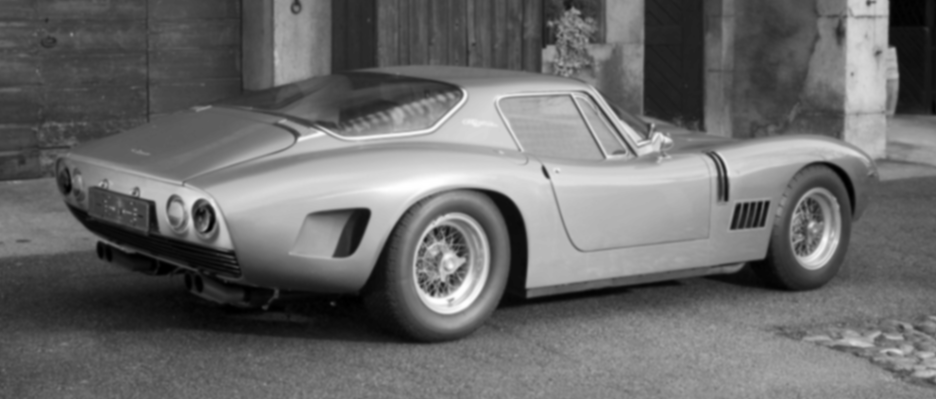

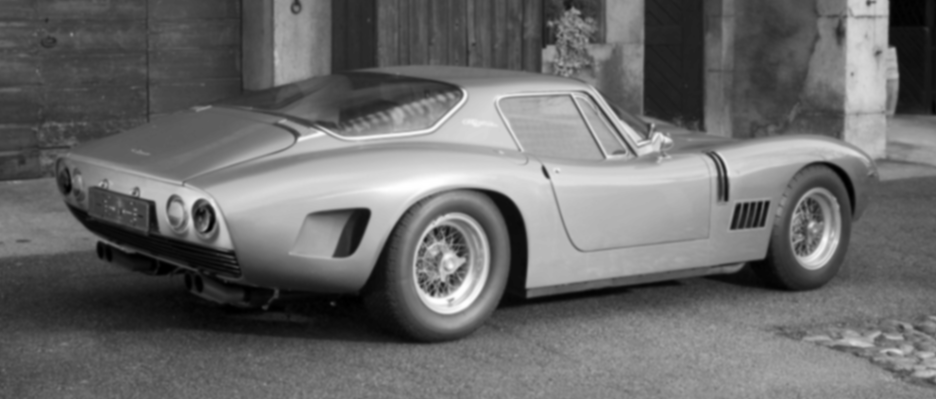

In [6]:
display_channel(gpu_conv, width - (recurse_cnt))
display_channel(cpp_conv, width - (recurse_cnt))     